In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from wordcloud import WordCloud

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df = pd.read_csv('/content/sentimentdataset.csv')

In [ ]:
# Print the first few rows and column names to check structure
print("Columns:", df.columns)
print(df.head())

# Clean column names if necessary
df.columns = df.columns.str.strip()

# Ensure you're using the correct column name for your analysis
if 'tweet' in df.columns:
    df['Sentiment_TextBlob'] = df['tweet'].apply(analyze_sentiment_textblob)
    df['Sentiment_VADER'] = df['tweet'].apply(analyze_sentiment_vader)
else:
    print("The column 'tweet' does not exist in the DataFrame.")


Columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:

In [ ]:
# Print the columns to check if 'Sentiment_TextBlob' exists
print(df.columns)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


In [ ]:
# Clean the dataset by removing unnecessary columns
df_clean = df[['Text', 'Sentiment', 'Platform', 'Timestamp', 'Country', 'Likes', 'Retweets', 'Year', 'Month', 'Day', 'Hour']].copy()

# Convert 'Timestamp' to datetime format using .loc[] to avoid warnings
df_clean.loc[:, 'Timestamp'] = pd.to_datetime(df_clean['Timestamp'])


<ipython-input-15-b22d4fd00306>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

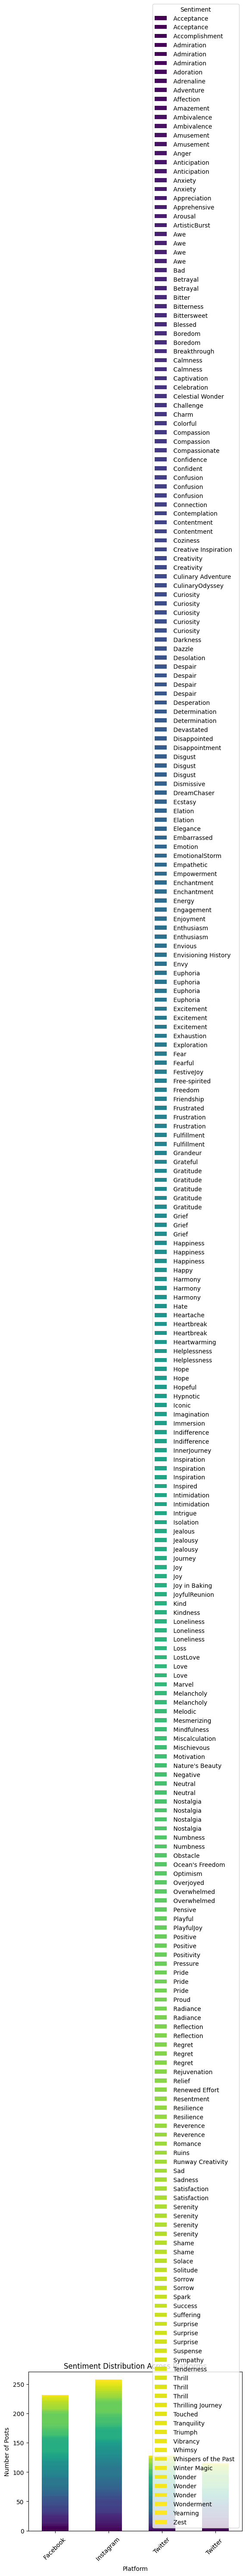

In [ ]:
#  Sentiment distribution across platforms
platform_sentiment = df_clean.groupby(['Platform', 'Sentiment']).size().unstack()

# Plot sentiment distribution by platform
plt.figure(figsize=(10, 6))
platform_sentiment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution Across Platforms')
plt.ylabel('Number of Posts')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-16-d0725c15270e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


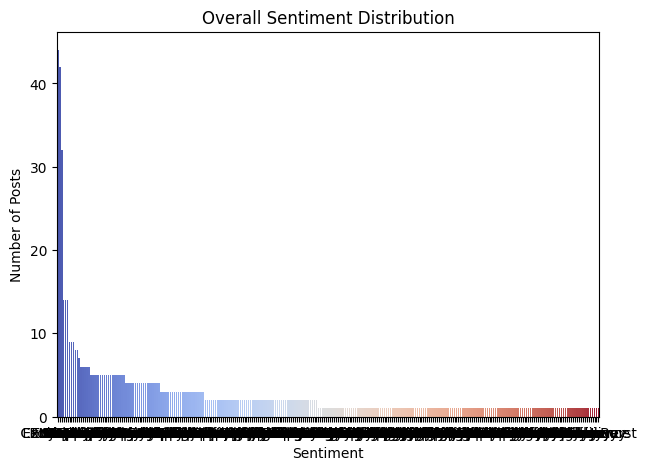

In [ ]:
#  Overall sentiment distribution
plt.figure(figsize=(7, 5))
sentiment_counts = df_clean['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Overall Sentiment Distribution')
plt.ylabel('Number of Posts')
plt.xlabel('Sentiment')
plt.show()


<ipython-input-21-70bf58f41142>:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

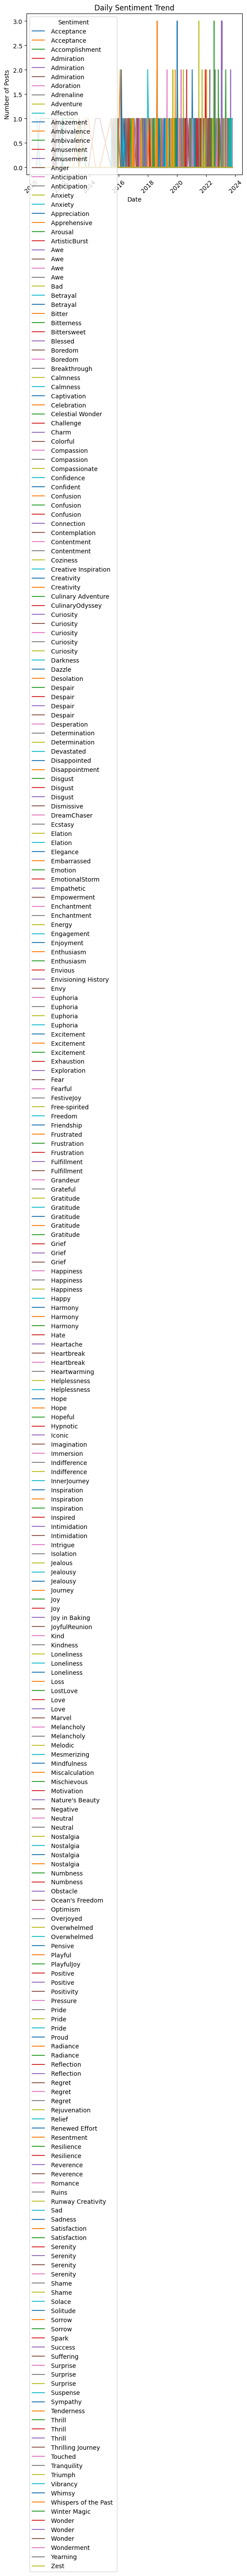

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sentimentdataset.csv'
df = pd.read_csv(file_path)

# Clean the dataset by removing unnecessary columns
df_clean = df[['Text', 'Sentiment', 'Platform', 'Timestamp', 'Country', 'Likes', 'Retweets', 'Year', 'Month', 'Day', 'Hour']].copy()

# Convert 'Timestamp' to datetime format, handling any errors and coerce invalid entries
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')

# Check for any rows where conversion failed (will show as NaT)
invalid_timestamps = df_clean[df_clean['Timestamp'].isna()]

if not invalid_timestamps.empty:
    print("Rows with invalid datetime values:")
    print(invalid_timestamps)

# Drop rows with invalid or missing datetime values in 'Timestamp'
df_clean = df_clean.dropna(subset=['Timestamp'])

# 3. Sentiment trends over time (daily sentiment trend)
df_clean['Date'] = df_clean['Timestamp'].dt.date

# Group by date and sentiment to see trends
daily_sentiment_trend = df_clean.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)

# Plot sentiment trend over time
plt.figure(figsize=(12, 6))
daily_sentiment_trend.plot()
plt.title('Daily Sentiment Trend')
plt.ylabel('Number of Posts')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


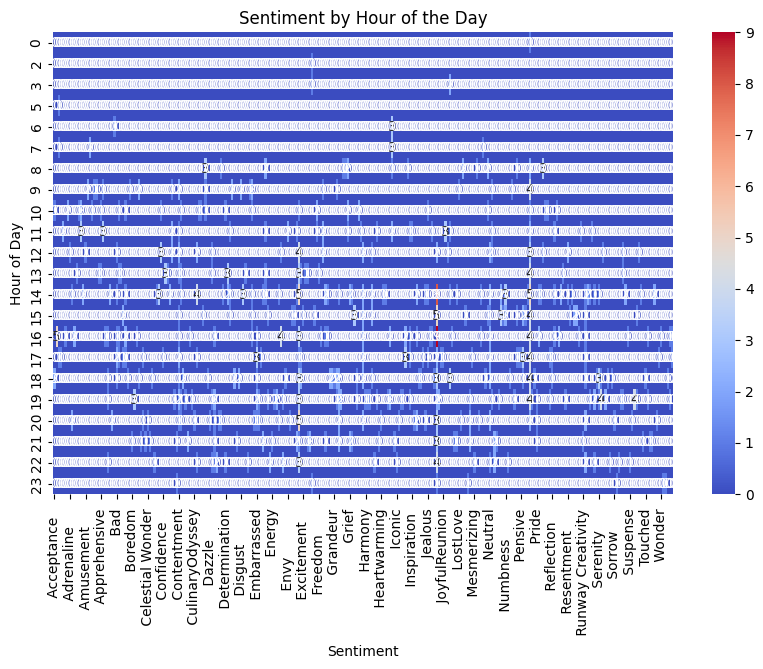

In [ ]:
#  Heatmap for sentiment based on the hour of the day
hourly_sentiment = df_clean.groupby(['Hour', 'Sentiment']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(hourly_sentiment, annot=True, cmap='coolwarm', fmt='g')
plt.title('Sentiment by Hour of the Day')
plt.ylabel('Hour of Day')
plt.xlabel('Sentiment')
plt.show()

<ipython-input-22-4a6b8f198231>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

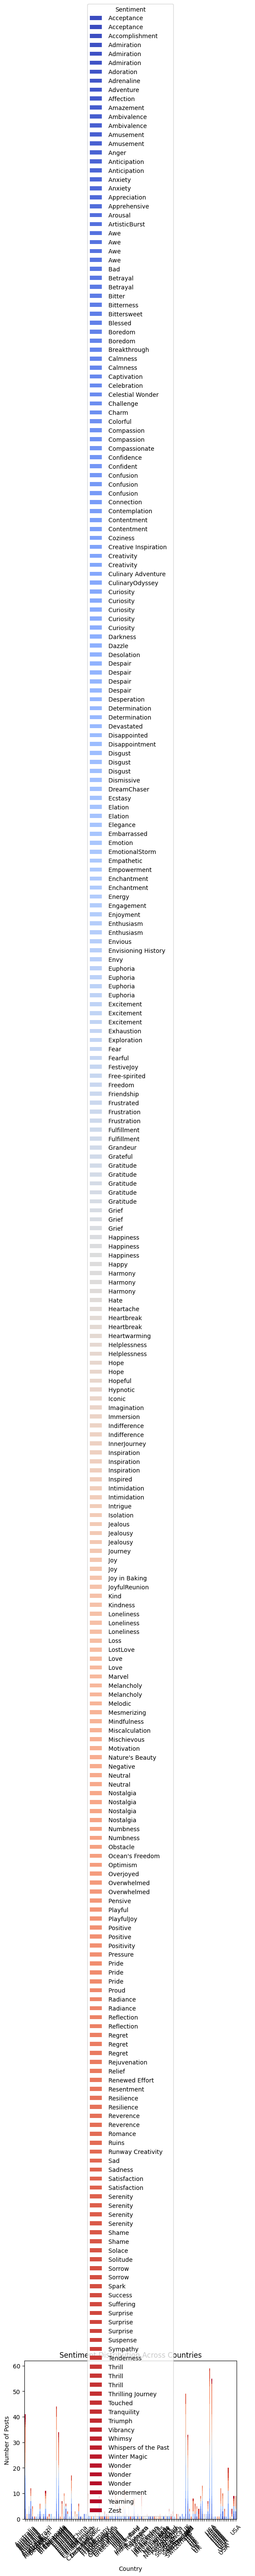

In [ ]:
# Sentiment distribution across countries
country_sentiment = df_clean.groupby(['Country', 'Sentiment']).size().unstack().fillna(0)

# Plot sentiment distribution by country
plt.figure(figsize=(10, 6))
country_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sentiment Distribution Across Countries')
plt.ylabel('Number of Posts')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-25-728e21f6fb46>:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

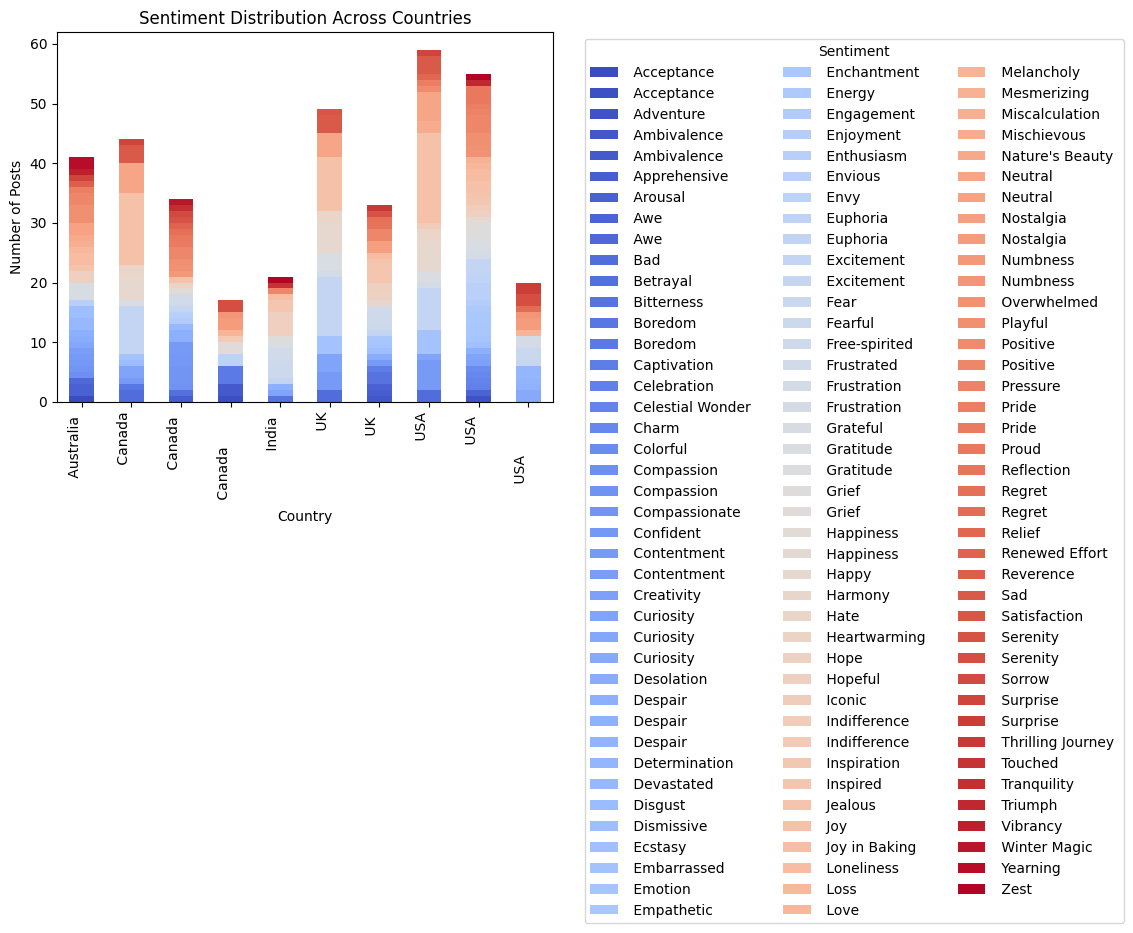

In [ ]:
# Plot sentiment distribution by country with better label formatting
plt.figure(figsize=(12, 6))
country_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title('Sentiment Distribution Across Countries')
plt.ylabel('Number of Posts')
plt.xlabel('Country')

# Rotate the x-axis labels to the right for better readability
plt.xticks(rotation=90, ha='right')

# Move legend to the right side and organize it into 3-4 columns
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_clean = pd.read_csv('/content/sentimentdataset.csv')

# Check unique sentiments in the dataset
print("Unique Sentiments:", df_clean['Sentiment'].unique())

# Filter for only the desired sentiments (Happy and Sad)
filtered_sentiments = df_clean[df_clean['Sentiment'].isin(['Happy', 'Sad'])]

# Check the shape of the filtered DataFrame
print("Filtered DataFrame Shape:", filtered_sentiments.shape)
print("Filtered DataFrame Head:\n", filtered_sentiments.head())

# Grouping sentiment by country for the selected sentiments
country_sentiment = filtered_sentiments.groupby(['Country', 'Sentiment']).size().unstack(fill_value=0)

# Check the shape of the grouped DataFrame
print("Grouped DataFrame Shape:", country_sentiment.shape)
print("Grouped DataFrame Head:\n", country_sentiment.head())

# Create a new figure for plotting if there is data to plot
if not country_sentiment.empty:
    plt.figure(figsize=(12, 6))  # Adjusted size for better clarity
    ax = country_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm')

    # Set plot title and labels
    plt.title('Sentiment Distribution Across Countries (Happy vs Sad)')
    plt.ylabel('Number of Posts')
    plt.xlabel('Country')

    # Rotate x-axis labels to the right side and align them correctly
    plt.xticks(rotation=45, ha='right')  # ha='right' aligns labels to the right

    # Adjust layout to fit everything nicely
    plt.tight_layout()

    # Move the legend to the right side
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()
else:
    print("No data available to plot.")


Unique Sentiments: [' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' He

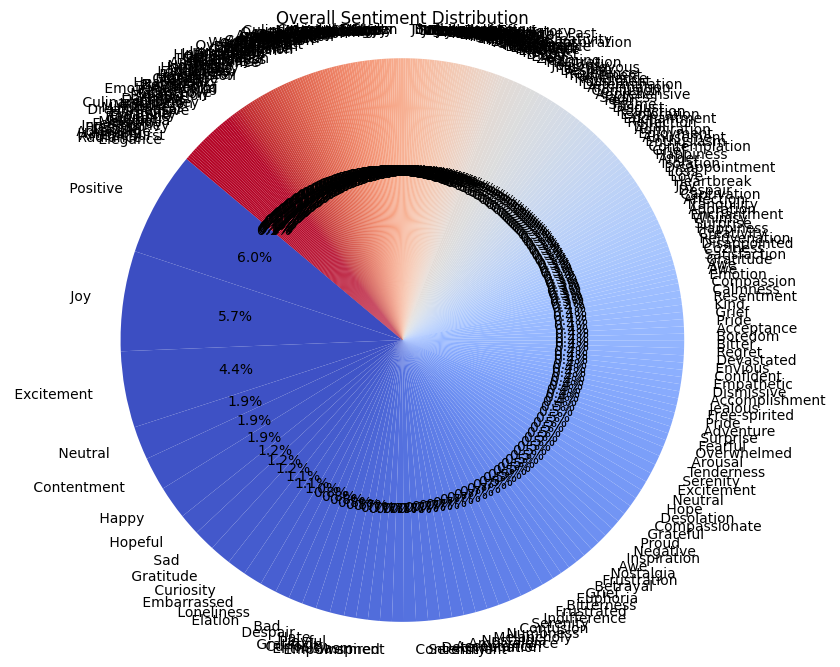

In [ ]:
# Sentiment distribution pie chart
plt.figure(figsize=(8, 8))
sentiment_counts = df_clean['Sentiment'].value_counts()

# Use the coolwarm colormap directly with the number of colors needed
colors = plt.cm.coolwarm(range(len(sentiment_counts)))

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Overall Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()
